In [383]:
import tensorflow as tf
from keras import datasets, models, layers
import numpy as np
import matplotlib.pyplot as plt

Loading the files

In [384]:
trnLabel = np.load("/content/trnLabel.npy")
trnImage = np.load("/content/trnImage.npy")
tstLabel = np.load("/content/tstLabel.npy")
tstImage = np.load("/content/tstImage.npy")


Checking out the dimensions of the datasets

In [385]:
tstImage.shape

(32, 32, 3, 1000)

In [386]:
trnImage.shape

(32, 32, 3, 10000)

In [387]:
tstLabel.shape

(1000, 1)

In [388]:
trnLabel.shape

(10000, 1)

Printing out some random images from the dataset

In [391]:
category = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
#taken from https://www.cs.toronto.edu/~kriz/cifar.html

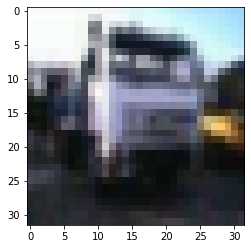

In [392]:
plt.imshow(trnImage[:, :, :,9999])
#trnImage[:, :, :,0].shape

In [393]:
category[trnLabel[9000,0]]
#checking out what Image is the above picture

'truck'

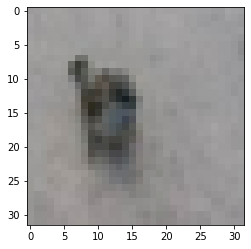

In [394]:
plt.imshow(trnImage[:, :, :,2700])

In [395]:
category[trnLabel[2700,0]]

'bird'

Swapping the axes so that colour channel is at last

In [397]:
trnImageAxesFix1 = np.swapaxes(trnImage, 3, 0)


In [398]:
trnImageAxesFix1.shape

(10000, 32, 3, 32)

In [399]:
trnImageAxesFix2 = np.swapaxes(trnImageAxesFix1, 2, 3)
trnImageAxesFix2.shape

(10000, 32, 32, 3)

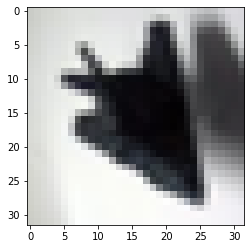

In [400]:
plt.imshow(trnImageAxesFix2[0])

Building a convolutional neural network using our training dataset

In [413]:
cnn = models.Sequential([
    #cnn layer1
    layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D(pool_size=(2, 2), strides=1),
    
    #cnn layer2
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    #cnn layer3
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    #ann layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [414]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [415]:
cnn.fit(trnImageAxesFix2, trnLabel, epochs=5)

Epoch 1/5
313/313 [==============================] - 26s 81ms/step - loss: 1.9599 - accuracy: 0.2688
Epoch 2/5
313/313 [==============================] - 27s 87ms/step - loss: 1.5396 - accuracy: 0.4392
Epoch 3/5
313/313 [==============================] - 25s 81ms/step - loss: 1.3829 - accuracy: 0.4981
Epoch 4/5
313/313 [==============================] - 25s 81ms/step - loss: 1.2791 - accuracy: 0.5380
Epoch 5/5
313/313 [==============================] - 26s 82ms/step - loss: 1.1656 - accuracy: 0.5791


In [416]:
#swapping the axes in test dataset 
tstImageAxesFix1 = np.swapaxes(tstImage, 3, 0)
tstImageAxesFix2 = np.swapaxes(tstImageAxesFix1, 2, 3)
tstImageAxesFix2.shape

(1000, 32, 32, 3)

In [417]:
cnn.evaluate(tstImageAxesFix2, tstLabel)

32/32 [==============================] - 2s 44ms/step - loss: 1.3394 - accuracy: 0.5310


[1.3393983840942383, 0.531000018119812]

The accuracy using our model on the test dataset comes out to be 53.1%

In [418]:
tstLabel_pred = cnn.predict(tstImageAxesFix2)

32/32 [==============================] - 1s 21ms/step


Finding out the image category index with the max probability in the probability distribution array 

In [419]:
tstLabel_pred_classes = [np.argmax(x) for x in tstLabel_pred]

Confusion Matrix

Text(69.0, 0.5, 'Ground Truth')

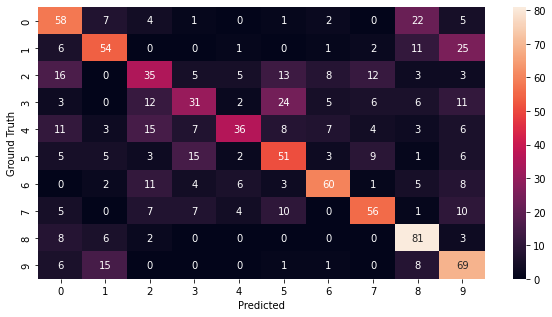

In [420]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(tstLabel, tstLabel_pred_classes)
import seaborn as sn
plt.figure(figsize = (10,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Ground Truth')
